In [1]:
!pip install mglearn

In [2]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

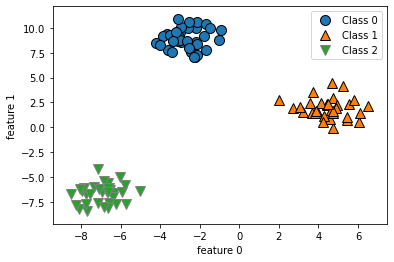

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1], y) 
# X에 0을 넣은것을 X축으로 X에 1를 넣은것을 y축으로 색상은 y로

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [5]:
linear_svm = LinearSVC().fit(X,y)

In [6]:
print(linear_svm.coef_)

[[-0.17492648  0.23140615]
 [ 0.4762121  -0.06937486]
 [-0.18914246 -0.20399628]]


In [7]:
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492648  0.23140615]
 [ 0.4762121  -0.06937486]
 [-0.18914246 -0.20399628]]
[-1.07745743  0.1314031  -0.08604806]


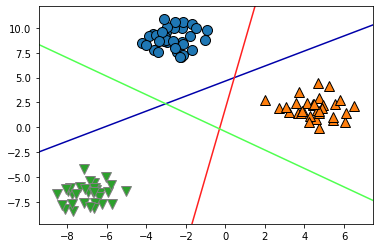

In [8]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_,
                                 linear_svm.intercept_,
                                 mglearn.cm3.colors):  #mglearn에 선택되있는 칼라값
    #colors자체적으로 각 숫자에 색이 들어가있음
    plt.plot(line, - (line * coef[0] + intercept)/ coef[1], c=color)
            #x축          y축의 값 

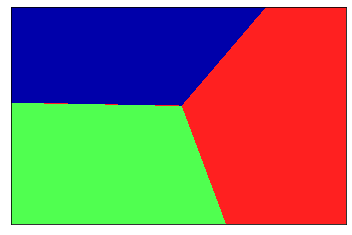

In [9]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True)

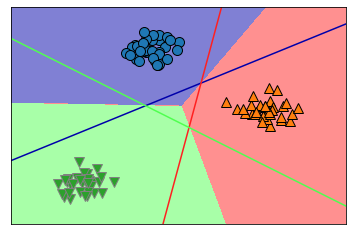

In [10]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_,
                                 linear_svm.intercept_,
                                 mglearn.cm3.colors): 
    #colors자체적으로 각 숫자에 색이 들어가있음
    plt.plot(line, - (line*coef[0] + intercept)/ coef[1], c=color)

# Tree 계열 분류 알고리즘
실제 데이터가 엉켜있을때 사용하기 좋음

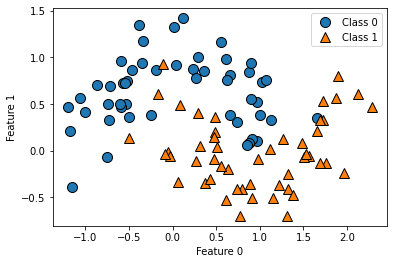

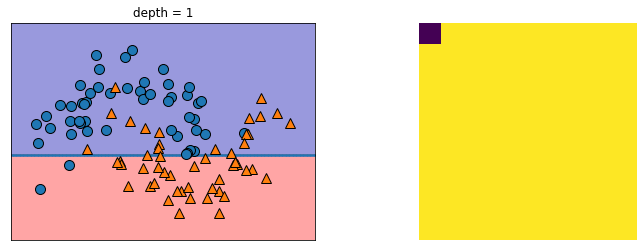

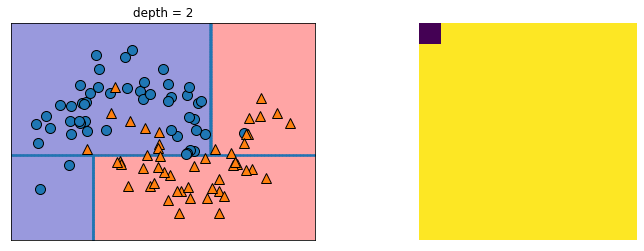

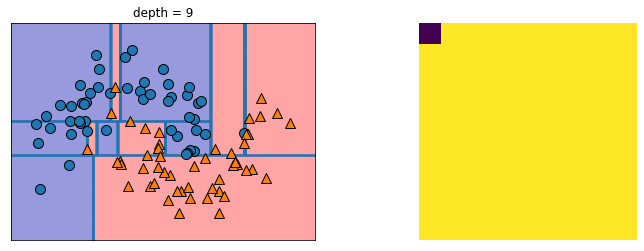

In [11]:
mglearn.plots.plot_tree_progressive()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9300699300699301


In [15]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) #4단계로 제약
tree.fit(X_train, y_train)

print(tree.score(X_train, y_train)) #train 정확도 떨어짐(제약으로 인해)
print(tree.score(X_test, y_test)) #test 정확도 높아짐(제약이 걸리면서 새로운 데이터에 대한 대응력이 좋아진것)

0.9953051643192489
0.951048951048951


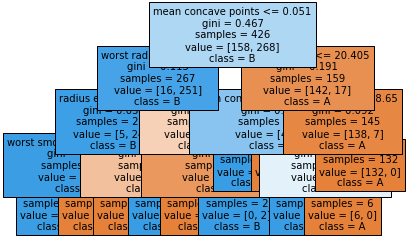

In [16]:
from sklearn.tree import plot_tree

plot_tree(tree, class_names=['A','B'], filled=True, fontsize=10,
         feature_names=cancer.feature_names)
plt.rcParams['figure.figsize'] = [15,10]
#fill: 색상을 채울수있는가?

In [17]:
print(tree.feature_importances_) #내부적인속성은 _(언더바)가 붙음

[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


Text(0, 0.5, 'Price')

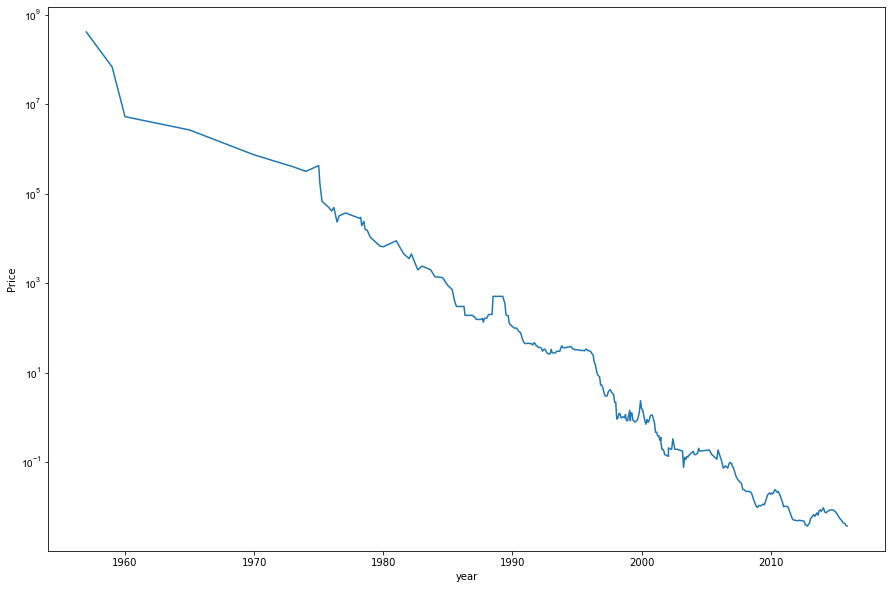

In [18]:
import os #운영체계와 관련된 패키지
import pandas as pd
ram_price = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_price.date, ram_price.price)
plt.yticks(fontname = 'Arial') #y축 단위를 지정
plt.xlabel('year')
plt.ylabel('Price')

In [19]:
from sklearn.tree import DecisionTreeClassifier

data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >= 2000]

In [20]:
data_train

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
197,197,1999.50,7.800000e-01
198,198,1999.67,8.700000e-01
199,199,1999.75,1.040000e+00
200,200,1999.83,1.340000e+00


In [21]:
type(data_train.date) #시리즈 객체

pandas.core.series.Series

In [22]:
#시리즈객체를 numpy로 뽑아낸다.
type(data_train.date.to_numpy()) 

numpy.ndarray

In [23]:
data_train.date.to_numpy()

array([1957.  , 1959.  , 1960.  , 1965.  , 1970.  , 1973.  , 1974.  ,
       1975.  , 1975.08, 1975.25, 1975.75, 1976.  , 1976.17, 1976.42,
       1976.58, 1977.08, 1978.17, 1978.25, 1978.33, 1978.5 , 1978.58,
       1978.75, 1979.  , 1979.75, 1980.  , 1981.  , 1981.58, 1982.  ,
       1982.17, 1982.67, 1983.  , 1983.67, 1984.  , 1984.58, 1985.  ,
       1985.33, 1985.42, 1985.5 , 1985.58, 1985.67, 1985.83, 1985.92,
       1986.  , 1986.08, 1986.17, 1986.25, 1986.33, 1986.42, 1986.5 ,
       1986.58, 1986.67, 1986.75, 1986.92, 1987.  , 1987.08, 1987.17,
       1987.25, 1987.33, 1987.42, 1987.5 , 1987.58, 1987.67, 1987.75,
       1987.83, 1987.92, 1988.  , 1988.08, 1988.17, 1988.33, 1988.42,
       1988.5 , 1988.58, 1988.67, 1988.75, 1988.83, 1988.92, 1989.  ,
       1989.08, 1989.17, 1989.25, 1989.42, 1989.5 , 1989.58, 1989.67,
       1989.75, 1989.83, 1989.92, 1990.  , 1990.17, 1990.33, 1990.42,
       1990.5 , 1990.58, 1990.67, 1990.75, 1990.83, 1990.92, 1991.  ,
       1991.08, 1991

In [24]:
X_train = data_train.date.to_numpy()[:,np.newaxis] #날짜에 배열이 들어가게됨, [] : 슬라이싱 하겠다

In [25]:
y_train = np.log(data_train.price) #log를 사용해서 변별력을 높인다.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [27]:
X_all = ram_price.date.to_numpy()[:,np.newaxis] #전체 날짜를 x로 만듬

In [28]:
pred_tree = tree.predict(X_all) #pred_tree 값은 price로 돼있음
pred_lr=linear_reg.predict(X_all)

In [29]:
price_tree = np.exp(pred_tree) #price가 로그가 적용된 상태 = 로그 메소드 사용한 것을 원래대로 돌린것
price_lr = np.exp(pred_lr)

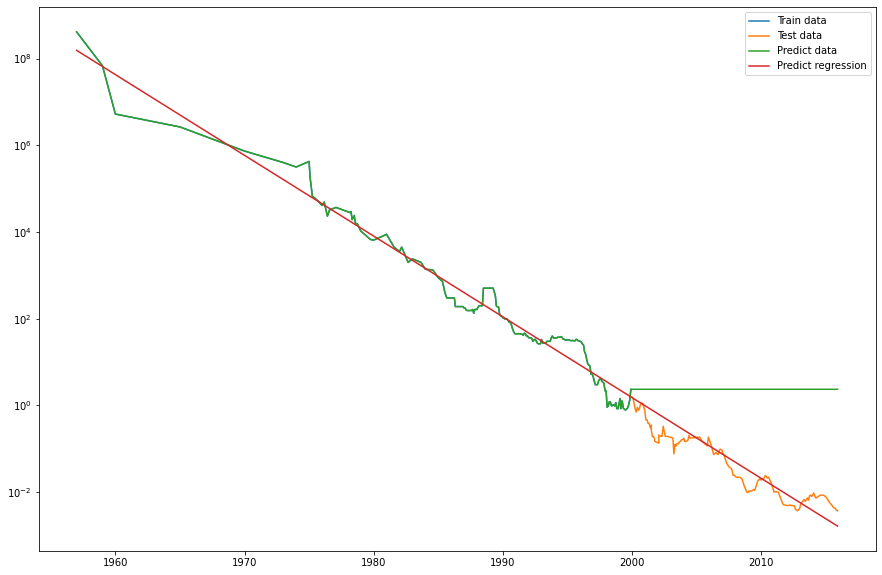

In [30]:
plt.semilogy(data_train.date, data_train.price, label='Train data') #x축,y축,라벨
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_price.date, price_tree, label='Predict data') 
    #tree 알고리즘은 train data는 2000까지만 있어서 2000년 이후로는 예측불가
plt.semilogy(ram_price.date, price_lr, label='Predict regression')
            #Regression 알고리즘은 예측 가능
plt.legend()

# RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons #make_ : 샘플데이터 만드는 패키지

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
 #샘플에 일부로 오류를 내는 것

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
forest = RandomForestClassifier(n_estimators=5) #5개의 트리로 펼쳐서 보고 합치는 것
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

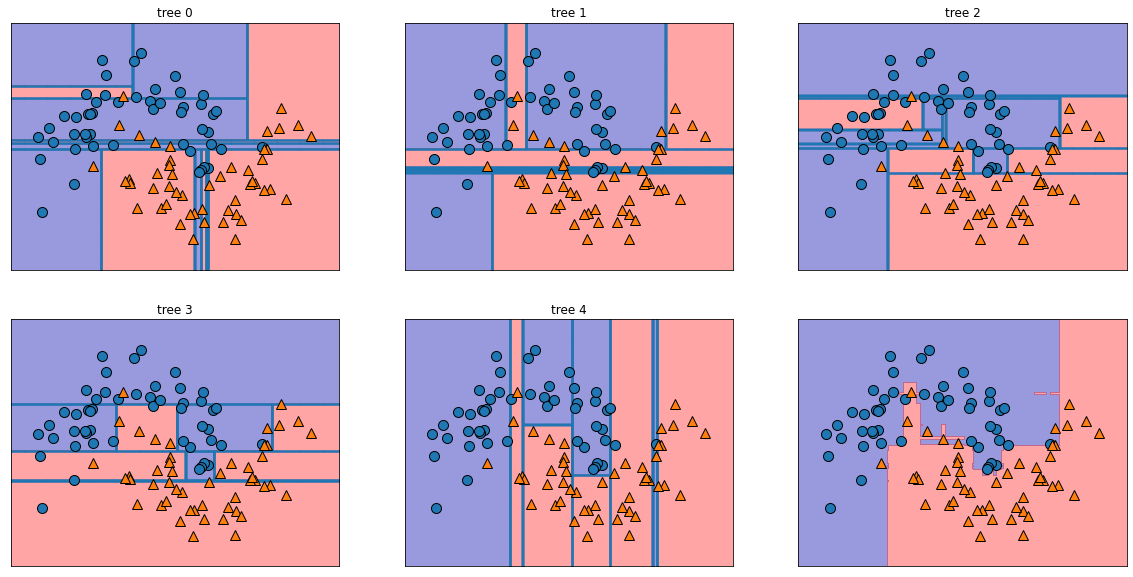

In [34]:
fig, axes = plt.subplots(2,3, figsize=(20,10))

#열거형으로 만들어 주는 함수, 반복가능한 자료형(index 넘버가붙음, ()안의 내용이 합쳐서 들어간다.) 
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)): #5개의 트리값이 들어가있음
  ax.set_title('tree {}'.format(i))
#내용 표현
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

#6번째 그림 채우기
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], #맨끝에서 1,1 이랑 똑같다
                               alpha=0.4) #배경
mglearn.discrete_scatter(X[:,0],X[:,1],y) #점

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

In [38]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [40]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
                    #depth를 묶으니 test정확도는 올라감
gbrt.fit(X_train,y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test)) 

0.9906103286384976
0.972027972027972


In [41]:
#학습하는 정도(학습량)도 테스트 가능
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) 
# 학습정도를 낮게 지정해서 둘 다 떨어졌음을 알 수 있음
gbrt.fit(X_train,y_train)

print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test)) 

0.9882629107981221
0.965034965034965


Text(0, 0.5, 'feature 1')

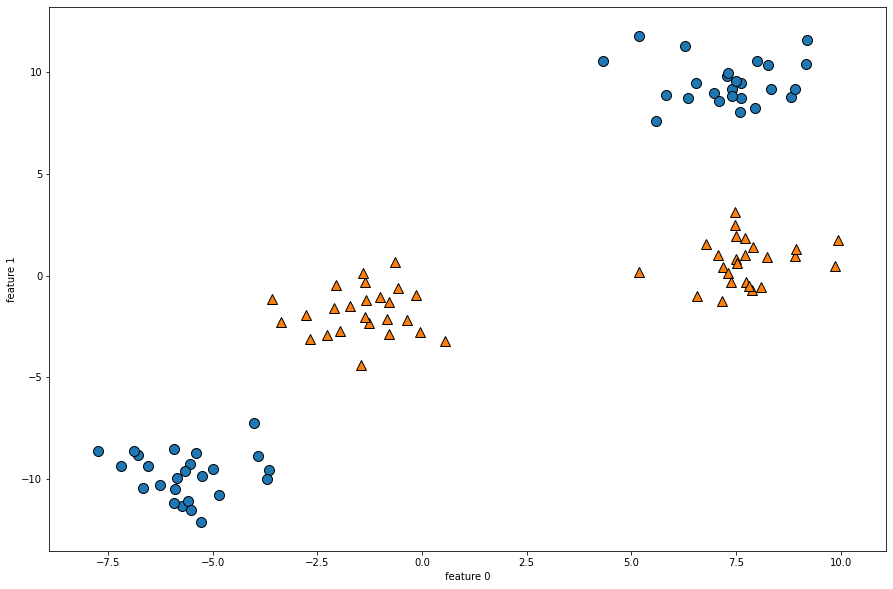

In [42]:
# 짝수 끼리, 홀수 끼리 묶는 법
X, b = make_blobs(centers=4, random_state=8)
b =  b % 2
mglearn.discrete_scatter(X[:,0],X[:,1], b)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [43]:
y #4개의 집합이 나오는 데이터 생성

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_21700/2497986102.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


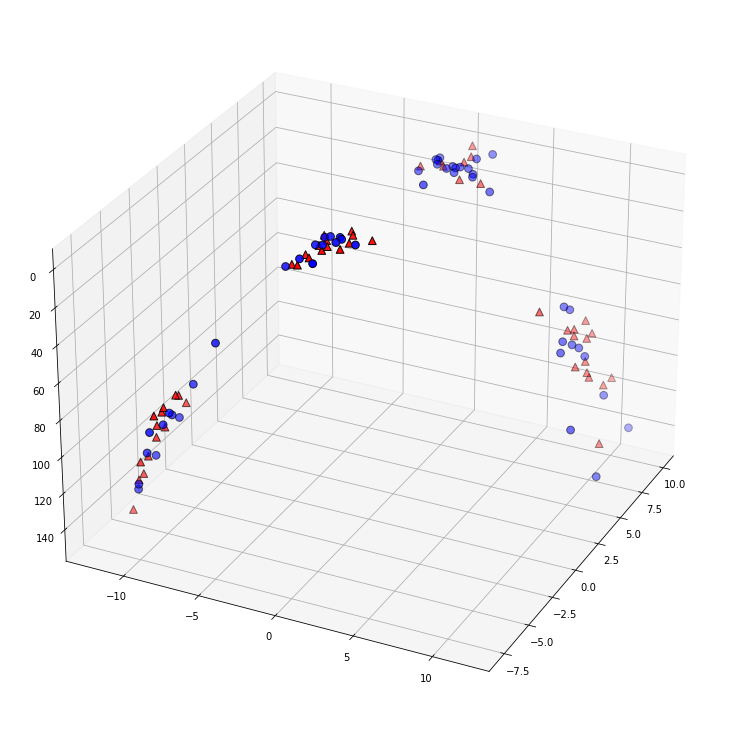

In [45]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60, edgecolor='k')

In [46]:
#3차원에서는 2차원(평면)으로 나눈다.
x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [47]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.903755868544601
0.9370629370629371
